# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">About the Data</div>

<div class="alert alert-block alert-info"> 📌 <b>Note</b>: The text in this section is copied from the respective <a href="https://www.kaggle.com/datasets/katerynameleshenko/ai-index" target="_blank">Dataset Description Page</a>.</div>

The Dataset **"AI Global index"** includes The Global AI Index itself and seven indicators affecting the Index on 62 countries, as well as general information about the countries (region, cluster, income group and political regime).

The **Global AI Index** is the first index to benchmark nations on their level of investment, innovation and implementation of artificial intelligence.

*Talent, Infrastructure and Operating Environment* are the factors of **AI Implementation** group of indicators, which represents the application of artificial intelligence by professionals in various sectors, such as businesses, governments, and communities.

- **Talent** indicator focuses on the availability of skilled practitioners for the provision of artificial intelligence solutions.
- **Infrastructure** indicator focuses on the reliability and scale of access infrastructure, from electricity and internet, to super computing capabilities.
- **Operating Environment** indicator focuses on the regulatory context, and public opinion surrounding artificial intelligence.

*Research and Development* are the factors of **Innovation** group of indicators, which reflects the progress made in technology and methodology, which signify the potential for artificial intelligence to evolve and improve.

- **Research** indicator focuses on the extent of specialist research and researchers; investigating the amount of publications and citations in credible academic journals.
- **Development** indicator focuses on the development of fundamental platforms and algorithms upon which innovative artificial intelligence projects rely.

*Government Strategy and Commercial* are the factors of **Investment** group of indicators, which reflects financial and procedural commitments to artificial intelligence.

- **Government Strateg**y indicator focuses on the depth of commitment from national government to artificial intelligence; investigating spending commitments and national strategies.
- **Commercial indicator** focuses on the level of startup activity, investment and business initiatives based on artificial intelligence.

All these seven indicators were calculated by [Tortoise Media](https://www.tortoisemedia.com/intelligence/global-ai/) via weighting and summarizing 143 other indicators.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Initial Data Inspection</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Specify the path to the file within your Google Drive
file_path = '/content/drive/MyDrive/AI_index_db.csv'  # Replace with the correct path

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


After the initial data inspection, we can confirm what [Global AI Race: Dominant Players and Aspiring Challengers](https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/) conveys on the dataset
<blockquote>
    <div class="alert alert-block alert-info"> ✅ The Global AI Index (GAII) is an indicator created by Tortoise Media to rank countries based on the capacity for AI, specifically by measuring investment, innovation, and implementation levels. According to the previous and current values of the GAII, Tortoise Media divides countries into five clusters - power players, traditional champions, rising stars, waking-up players, and nascent players.<br><br>

According to the GAII measured by Tortoise Media,

 two power players are on the map - the United States and China

 The following two countries, the United Kingdom and Canada are traditional champions (according to Tortoise Media’s classification).<br>
 Germany and France are the other two traditional champions

  The other rising stars are Australia, Irlandia, Finlandia, Denmark, Japan, and Spain, Israel, Singapore, South Korea, and the Netherlands
  
   All the other countries (among the analyzed 62 countries) except Sri Lanka, Egypt, Kenia, Nigeria, and Pakistan are the waking-up players; the last are nascent AI market players.</div>
</blockquote>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,16.803065,63.503710,66.925484,16.610000,14.824677,57.865645,6.171935,23.914677
std,15.214963,20.217525,20.000424,17.413996,19.419279,26.252448,14.029632,15.123586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.365000,55.857500,58.107500,3.032500,1.202500,41.030000,0.697500,14.805000
50%,13.445000,65.230000,69.505000,12.930000,9.005000,63.930000,2.585000,23.220000
75%,24.567500,75.947500,80.500000,25.412500,19.980000,77.952500,5.307500,30.487500
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


We can see that

- There are no missing values in the dataset , with 62 countries (records) presented there to describe their  AI potential as of 2023
- There are 8 numeric and 4 categorical variables in the dataset
- All numeric variables have their values in the range from 0 to 100
- *Total score* variable can be considered to be the *target* variable whereas other variables can describe the various effects on it

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Express EDA of Numeric Variables</div>

numeric variables in our dataset.

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Univariate Analysis: Numerical variables</div>

Let's look at the distribution of the numeric variables

In [7]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Distribution of Talent</b>',
                                                    '<b>Distribution of Infrastructure</b>',
                                                    '<b>Distribution of Operating Environment</b>',
                                                    '<b>Distribution of Research</b>',
                                                    '<b>Distribution of Development</b>',
                                                    '<b>Distribution of Government Strategy</b>',
                                                    '<b>Distribution of Commercial</b>',
                                                    '<b>Distribution of Total score</b>'
                                                   ))

fig.add_trace(go.Histogram(x=df['Talent'], nbinsx=30), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Infrastructure']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Operating Environment'], nbinsx=30), row=1, col=3)
fig.add_trace(go.Histogram(x=df['Research'], nbinsx=30), row=1, col=4)

fig.add_trace(go.Histogram(x=df['Development'], nbinsx=30), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Government Strategy']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['Commercial'], nbinsx=30), row=2, col=3)
fig.add_trace(go.Histogram(x=df['Total score'], nbinsx=30), row=2, col=4)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=800,
    height=500,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=10)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

We find that
- Infrastructure and Operating Environment are skewened to the right a little
- Other numeric variables are significantly left-skewed
- The values of Talent, Research, Development, Commercial and Total score have clear outliers to the right side of the distribution (it is related to two countries in Power players cluster)

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Multivariate Analysis: Correlation between numerical variables</div>

<Axes: >

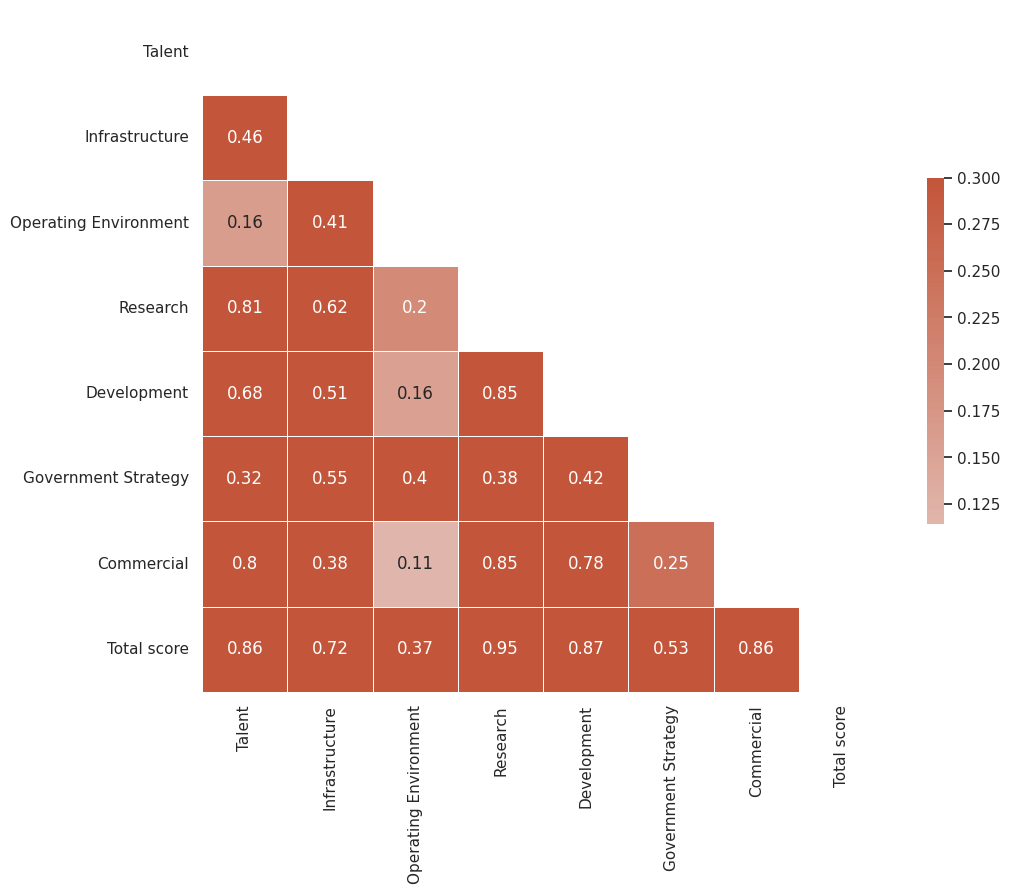

In [9]:
sns.set_theme(style="white")

# make a dataframe with only numberic variables, without 'Outcome'
d = df.select_dtypes(include=np.number).copy() # Select only numeric columns

# Compute the correlation matrix for numeric features
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We find that
- Total score is highly correlated with Research (0.95), Development (0.87), Talent (0.86), and Commercial (0.86) variables
- Total score displays mediuum correlations with Government Strategy  and Operating Environment variables (that is, the contribution of such variables to the Total score is less then the highly correlated variables)

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Express EDA of Categorical Variables</div>

Let's briefly look at the categorical variables in the dataset.

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Univariate Analaysis: Categorical variables</div>

In [ ]:
# add which country is in which category

In [10]:
dfg = df['Region'].value_counts().reset_index()
dfg.columns = ['Region', 'Quantity']
fig = px.bar(dfg, x='Region', y='Quantity',
             title='Number of Countries in Report by Region (Continent)',
            color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

We find that the dataset contains the information about
- *29* countries in *Europe*
- *14* countrie in *Asia-Pacific* region
- *8* countries in *Americas* region
- *6* countries in the *Middle East*
- *5* countries in *Africa*

<div class="alert alert-block alert-info"> 🔅 <b>Note</b>: The data in this dataset is presented for the countries that decided to start serious efforts to adopt AI technologies. Countries that, according to the experts in Tortoise Media, are not on the way to adapt AI technologies are not listed there.
</div>

In [11]:
dfg = df['Cluster'].value_counts().reset_index()
dfg.columns = ['Cluster', 'Quantity']
fig = px.bar(dfg, x='Cluster', y='Quantity',
             title='Number of Countries in Report by Cluster',
            color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

We find that

- *Power players* cluster contains two leading nations in terms of adopting the AI on a serious scale (these are USA and China)
- *Traditional champions* cluster unites 4 nations (UK, Canada, France, and Germany) that follow the  power players
- *Rising stars* cluster aggregates 11 countries that are on a serious rise in terms of the AI development/commercializing progress
- *Waking up* cluster comprises 40 countries that just started smooth progress in AI
- *Nascent* cluster is a union of 5 countries that are at the very beginning of their way to adapt AI on the national level

In [12]:
dfg = df['Income group'].value_counts().reset_index()
dfg.columns = ['Income group', 'Quantity']
fig = px.bar(dfg, x='Income group', y='Quantity',
             title='Number of Countries in Report by Income groups',
            color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

We find that
- There are *43* countries with *High* income level (out of 62 presented in the dataset)
- There are *9* countries with *Upper middle* level of incomes
- There are *8* countries with *Lower middle* level of incomes

<div class="alert alert-block alert-info"> 🔅 <b>Note</b>: As we can see, AI is expensive. Only countries with High- or Middle-level incomes can afford to participate in the AI races at the moment.
</div>

In [72]:
dfg = df['Political regime'].value_counts().reset_index()
dfg.columns = ['Political regime', 'Quantity']
fig = px.bar(dfg, x='Political regime', y='Quantity',
             title='Number of Countries in Report by Political regimes',
            color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()

We find that
- *27* countries listed in the dataset operate under *Liberal democracy* regime
- *20* countries listed in the dataset operate under *Electoral democracy* regime
- *8* countries listed in the dataset operate under *Electoral autocracy* regime
- *7* countries listed in the dataset operate under *Closed autocracy* regime

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Multivariate Analaysis: Associations between categorical variables</div>

Let's look at the associations between Region, Cluster, and Income groups first.

In [13]:
agg_data = df[["Region", "Cluster", "Income group"]].groupby(["Region", "Cluster", "Income group"]).size().reset_index(name="Count")
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Cluster", "Income group"],
    title="Number of countries by region, cluster, and income group",
    color="Region",
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# display the figure
fig.show()

We find that
- the biggest group of the countries in the  dataset are European countries with High income level, fitting into Waking Up cluster
- countries with High income level, fitting into Waking Up cluster, are the most numerous group in Aasia-Pacific and Middle East regions, too
- the most 'crowdy' group in Americas is Waking Up, with Upper middle income level
- Traditional champions and Raising star countries are all with High level of incomes
- One of the Power players (USA) is with the High level of incomes, and another Power player (China) in Uppper middle income group

Now, let's look at the separation of the countries in AI Index dataset by the income group and political regimes.

In [14]:
agg_data = df[["Region", "Income group", "Political regime"]].groupby(["Region", "Income group", "Political regime"]).size().reset_index(name="Count")
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Income group", "Political regime"],
    title="Number of countries by region, income group, and political regime",
    color="Region",
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# display the figure
fig.show()

We find that
- the biggest groups in Europe and Asia-Pacific regions represent the countries with High income and either Liberal or Electoral democracy
- the biggest group of countries in Americas contains the countries with High income level and Liberal democracy as a political regime
- the biggest group of countries in Middle East contains the countries with High income level and Closed autocraty as a political regime

Now, let's look at the associations between Region, Cluster, and Political regime.

In [15]:
agg_data = df[["Region", "Cluster", "Political regime"]].groupby(["Region", "Cluster", "Political regime"]).size().reset_index(name="Count")
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Cluster", "Political regime"],
    title="Number of countries by region, cluster, and political regime",
    color="Region",
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# display the figure
fig.show()

We find that

- Rasing stars and Traditional champions operate under Liberal or Electoral democracy, in every region
- One of the Power players (USA) operates under Liberal democracy,and another Power player (China) operates under Closed autocracy political regime

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Deeper-Dive Insights</div>

In the chapters below, we are going look deeper at the business-level and public administration insights drawn from the data in AI dataset.

First of all, we are going to look at the relations between *Total score* and other variables in the dataset

Then we are going to outline the holistic insights on

- AI Implementation
- AI Research and Development
- AI Governance and Commercial contexts


# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Total Score Insights</div>

In [16]:
total_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Total score']]

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Total Score: Geospacial View</div>

In [17]:
# set the size of the geo bubble
def set_score_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

total_df['Size'] = total_df.apply(lambda x: set_score_size(x['Total score']), axis=1)

fig = px.scatter_geo(
    total_df, locations="Country", locationmode='country names',
    color="Total score",
    size='Size', hover_name="Country",
    range_color= [0, 100],
    projection="natural earth",
    title='AI Total Score Across the Globe',
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

<ipython-input-17-bf9d9d8a6cba>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
total_df.sort_values('Total score',
                   ascending=False)[
                        [
                          'Country',
                          'Total score'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Country,Total score
0,United States of America,100.000000
1,China,62.920000
2,United Kingdom,40.930000
3,Canada,40.190000
4,Israel,39.890000
5,Singapore,38.670000
6,South Korea,38.600000
7,The Netherlands,36.350000
8,Germany,36.040000
9,France,34.420000


We find that
- the Power players (USA, China) lead the ranks , although the gap between the total score of USA and China is significant
- some of the countries in Rasing stars cluster (Israel, Singapore, South Korea, The Netherlands) outperform some of the traditional  champions (that is, Germany and France), in terms of the total score
- India does not fit into the top ten list of the countries by *Total score*, although it holds the second position in terms of AI Talent score

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Total Score by Regions</div>

In [19]:
fig = px.violin(total_df, y="Total score", x="Region", box=True, points="all", title="Total score by Regions", hover_data=total_df.columns)
fig.show()

In [20]:
# implement binning by Total Score categories

def set_score_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

total_df["Score_level"] = total_df["Total score"].apply(set_score_level)

agg_data = total_df.groupby(['Region', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Region',
    y='Country_count',
    color='Score_level',
    title="Countries by Region and Total Score level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

<ipython-input-20-8a092b1b5467>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We find that

- There is just one country with the Very high-level Total score (USA, in Americas region)
- There is just one coutnry with the the High-level Total score (China, Asia-Pacific region)
- There are just two countries with the moderate-level Total score (Canada, UK); however, they are less than 1-2 units above the bunch of traditional champions and raising star countries with the Total score of 38+ or 39+ (the latter countries classified as Low-level in terms of their Total score)
- the distribution of Total score in Middle East and Africa shows these regions has more countries with lower Total score vs. Americas, Europe, and Asia-Pacific

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Total Score by Clusters</div>

In [21]:
fig = px.violin(total_df, y="Total score", x="Cluster", box=True, points="all", title="Total score by Clusters", hover_data=total_df.columns)
fig.show()

In [22]:
agg_data = total_df.groupby(['Cluster', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Cluster',
    y='Country_count',
    color='Score_level',
    title="Countries by Region and Total Score level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

We find that

- the average Total score is higher in Power players and Traditional champions clusters
- some of the countries in Raising stars cluster are still scored higher then two of the traditional champions (Germany, France)

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Total score by Income groups</div>


In [23]:
g = px.violin(total_df, y="Total score", x="Income group", box=True, points="all", title="Total score by Income group", hover_data=total_df.columns)
g.show()

In [24]:
agg_data = total_df.groupby(['Income group', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Income group',
    y='Country_count',
    color='Score_level',
    title="Countries by Income group and Total score level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

We find that

- the overall trend is, the countries with High income level have higher average Total score vs. other income groups
- there are notable outliers in every income group
- USA, one of the Power players, stands out of the 'crowd' of the countries with the High income level
- China, another Power player, severely outperforms the rest of the countries in Upper middle income group
- India strongly outperforms the rest of the nations in Lower middle income group; actually, its score is higher then the score of all countries in Upper middle income group (except for China), and 75% of the countries in High income group

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Total score by Political regime</div>


In [25]:
g = px.violin(total_df, y="Total score", x="Political regime", box=True, points="all", title="Total score by Political regime", hover_data=total_df.columns)
g.show()

In [26]:
agg_data = total_df.groupby(['Political regime', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Political regime',
    y='Country_count',
    color='Score_level',
    title="Countries by Political regime and Total score level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

We find that
- There are much more countries with political regimes of Liberal democracy and Elecrotal democracy that ranked higher Total score in the list (the leading Power player, USA, is amoung them)
- At the same time, we can see some of the  countries with autocratic regimes to be quite successful in AI, too (China, another Power player, is an example of that)

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Holistic View on AI Implementation</div>

Implementation metrics represent the application of artificial intelligence by professionals in various sectors, such as businesses, governments, and communities. The implementation factors group may be divided into three smaller groups

- Talent,
- Infrastructure, and
- Operating Environment.



In [27]:
fig = px.scatter_3d(df, x='Region', y='Talent', z='Infrastructure', color='Operating Environment', hover_name="Country",
                   title='Talent-Infrastructure-Operating Environment Inter-relations by Regions')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [28]:
fig = px.scatter_3d(df, x='Cluster', y='Talent', z='Infrastructure', color='Operating Environment', hover_name="Country",
                   title='Talent-Infrastructure-Operating Environment Inter-relations by Clusters')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [29]:
fig = px.scatter_3d(df, x='Income group', y='Talent', z='Infrastructure', color='Operating Environment', hover_name="Country",
                   title='Talent-Infrastructure-Operating Environment Inter-relations by Income Groups')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()


After the analysis of the visualizations above, we can confirm what [Global AI Race: Dominant Players and Aspiring Challengers](https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/) conveys on the AI Implementation indicators
<blockquote>
    <div class="alert alert-block alert-info"> ✅ <b>Americans Are Most Talented in AI</b>
The talent factors group emphasizes the presence of proficient experts who can deliver artificial intelligence solutions. They include the absolute and relative numbers of AI engineers, Data Scientists, and Machine engineers, commits related to AI on GitHub, Kaggle ‘grandmasters’ and IT graduates, etc.<br><br>
According to the provided dataset, the <b>United States</b> is the top country in the number of AI talents (an average score of all factors is 100). The following country with the lower score is India (a score of 45,3). The other three countries in the top-5 countries with skilled practitioners in AI are Great Britain, Singapore, and Israel, with almost equal scores (~40). The law scores of leaders and score median of 13.45 demonstrate an <b>unfavorable state</b> of the AI experts market for most countries.
    </div>
    <div class="alert alert-block alert-info"> ✅ <b>China’s Infrastructure Is Most Appropriate for AI</b>
        
Infrastructure factors focus on the dependability and scalability of the access infrastructure, ranging from electricity and internet to supercomputing capabilities. These factors include the ratio of the total population with access to electricity,  the internet, the level of 5G implementation, etc.<br><br>

As data say, China is better prepared for AI technologically (a score is 100). Hong Kong, Luxemburg, and the United States are just a little behind, with scores higher than 90. Ireland ends the top-5 rating with a score of 89.5. 80% of the analyzed countries have an Infrastructure indicators score higher than 50, while just one country has a total score of the Talent group indicators higher than 50. It illustrates the high global level of infrastructural capacity in comparison with the deficit of AI specialists.
    </div>
    <div class="alert alert-block alert-info"> ✅ <b>Saudi Arabia's Society Is Most Friendly to AI</b>
The Operating Environment group of factors concentrates on the regulatory environment and the public perception of artificial intelligence. The group consists of such factors as the level of data privacy legislation, gender diversity of AI professionals, the share of people who trust AI, etc.<br>

Generally, the world society is optimistic about AI (85% of the analyzed countries have an Operating Environment group score higher than 50); the five most benevolent countries are Saudi Arabia (a score is 100), Poland, Mexico, Slovenia, and Canada.
    </div>
    <div class="alert alert-block alert-info"> 🚩 <b>Generic note:</b> Under weights for each indicator group, justified by Tortoise Media in their <a href="https://www.tortoisemedia.com/wp-content/uploads/sites/3/2021/12/Global-AI-Index-Methodology-3.0-211201-v2.pdf" target="_blank">methodology report</a>, the Top 5 countries with the highest AI implementation level are the United States, The Netherlands, Canada, China, and Great Britain. Only 35% of analyzed countries have an implementation score higher than 50.
    </div>
</blockquote>

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Holistic View on AI Innovations</div>

Innovation metrics reflect the progress made in technology and methodology, which signify the potential for artificial intelligence to evolve and improve. According to Tortoise Media, the innovation metrics are divided into two smaller groups

- Research
- Development

In [30]:
fig = px.scatter_3d(df, x='Region', y='Research', z='Development', color='Total score', hover_name="Country",
                   title='R&D Inter-relations by Regions')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [34]:
fig = px.scatter_3d(df, x='Cluster', y='Research', z='Development', color='Total score', hover_name="Country",
                   title='R&D Inter-relations by Clusters')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [35]:
fig = px.scatter_3d(df, x='Income group', y='Research', z='Development', color='Total score', hover_name="Country",
                   title='R&D Inter-relations by Income groups')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [36]:
fig = px.scatter_3d(df, x='Political regime', y='Research', z='Development', color='Total score', hover_name="Country",
                   title='R&D Inter-relations by Political regimes')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

The charts above confirms what [Global AI Race: Dominant Players and Aspiring Challengers](https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/) conveys on the AI Innovation indicators

<blockquote>
    <div class="alert alert-block alert-info"> ✅ <b>US Specialists Are Generating More AI Ideas.</b>
The Research indicator analyzes the degree of specialization among researchers and their research activities, specifically focusing on quantifying the number of publications and citations in reputable scholarly journals. This complex indicator accounts for total spending on research and development, the absolute and relative number of AI-related articles, researchers, and universities with AI-related courses.<br><br>

The global state of the AI Research indicator is unpleasant — only two countries have scored higher than 50, one of which is the United States (a score is 100). It’s not surprising since we have already found that the country has the most specialists related to AI. The second country is China (a score of 71,4); it has been investing heavily in AI and technology education in recent years to become a global leader in the AI sphere. The following three countries on the top-5 list are Switzerland, Singapore, and the United Kingdom.
    </div>
    <div class="alert alert-block alert-info"> ✅ <b>AI Development in the USA Is at the Highest Level.</b> The group of Development indicators focuses on fundamental platforms and algorithms development upon which innovative artificial intelligence projects rely. It includes the absolute and relative number of software developers who are core creators of open-source "AI packages," the number of commits to "open-source AI packages," the number of patents relating to "AI," etc.<br>

Globally, only three countries are on a high level of development in the AI field; they are the USA (a score is 100), China (a score is 80), and South Korea (a score is 77,3). The score of other countries is lower than 50. To complete the top-5 list, - the last two countries are Australia and Japan.
    </div>
        <div class="alert alert-block alert-info"> 🚩 <b>Generic note:</b> The Top 5 countries with the highest level of innovation in AI are the United States, China, South Korea, Australia, and Switzerland. However, only the first two have an innovation score higher than 50. It testifies to the low level of AI development among the countries (in comparison with the leader - the USA) despite the shreds of evidence of AI worldwide exponential growth.
    </div>
</blockquote>

<div class="alert alert-block alert-info"> 🔅 <b>Note</b>: Additionally, we can observe the interesting 'outlier' represented by <b>South Korea</b>. This country demonstrates quite a low value of AI Research while its AI Development index is within the top 5 list for the entire dataset. It can idicate the country to become a powerful hub for prototyping various AI-centric solutions, products, and hardware where the ideas/patents proposed by the specialists from other countries are being 'productized'/validated by the practical applications.
</div>

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Holistic View on AI Investments</div>

Investment metrics reflect financial and procedural commitments to artificial intelligence. Tortoise Media divides these metrics into two groups of indexes - Government Strategy and Commercial.

In [37]:
fig = px.scatter_3d(df, x='Region', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country",
                   title='AI Investments by Regions')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [38]:
fig = px.scatter_3d(df, x='Cluster', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country",
                   title='AI Investments by Clusters')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [39]:
fig = px.scatter_3d(df, x='Income group', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country",
                   title='AI Investments by Income groups')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [40]:
fig = px.scatter_3d(df, x='Political regime', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country",
                   title='AI Investments by Political regimes')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

The charts above confirms what [Global AI Race: Dominant Players and Aspiring Challengers](https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/) conveys on the AI Investment indicators

<blockquote>
    <div class="alert alert-block alert-info"> ✅ <b>The Canadian Government Is the Most Inclined Toward the AI Growth.</b> The Government Strategy indicator focuses on the extent of national commitment to artificial intelligence by examining both spending allocations and national-level plans. It factors in the amount of dedicated investment in AI by the government, the level of tax credit for research and development,  dedicated spending on AI, etc. <br><br>
Almost 70% of the countries in the dataset are ready for AI evolution at the governmental level; their Government Strategy indicator score is higher than 50. The first five countries in the rate are Canada, China, Saudi Arabia, Spain, and France (it is 5 out of 6 countries with a score higher than 90).
    </div>
    <div class="alert alert-block alert-info"> ✅ <b>The United States Is an Absolute Leader in the AI Commercialisation.</b> Commercial indicators evaluate the degree of startup engagement, investment, and business ventures that rely on artificial intelligence. These indicators include the absolute and relative numbers of AI companies and startups, their total and average funding, etc.<br><br>
The United States is leading in the commercialization of AI and has no direct competition in this field. China is the closest country to the USA but is 66% behind. The three following countries are Israel, the United Kingdom, and Singapore; their commercial scores are lower than 30.<br><br>
Although the United States Government Strategy in AI is not even in the top-5 of the strongest ones, it is scoring high on Investment indicators and is ranking first. The following four countries are China, Israel, the United Kingdom, and Canada; their Investment level is far behind the USA.
    </div>
</blockquote>

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Talent Insights</div>

In [41]:
talent_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Talent']]

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Talent: Geospacial view</div>

In [42]:
# set the size of the geo bubble
def set_talent_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

talent_df['Size'] = talent_df.apply(lambda x: set_talent_size(x['Talent']), axis=1)

fig = px.scatter_geo(
    talent_df, locations="Country", locationmode='country names',
    color="Talent",
    size='Size', hover_name="Country",
    range_color= [0, 100],
    projection="natural earth",
    title='AI Talent Across the Globe',
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

<ipython-input-42-a1b4f09ffbec>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
talent_df.sort_values('Talent',
                   ascending=False)[
                        [
                          'Country',
                          'Talent'
                        ]
][:10].style.background_gradient(cmap='seismic')

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Talent By Regions</div>

In [43]:
fig = px.violin(talent_df, y="Talent", x="Region", box=True, points="all", title="Talent by Regions", hover_data=talent_df.columns)
fig.show()

In [44]:
# implement binning by Talent categories

def set_talent_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

talent_df["Talent_level"] = talent_df["Talent"].apply(set_talent_level)

agg_data = talent_df.groupby(['Region', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Region',
    y='Country_count',
    color='Talent_level',
    title="Countries by Region and Talent level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

<ipython-input-44-4328a636d5f1>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Talent by Clusters</div>

In [45]:
fig = px.violin(talent_df, y="Talent", x="Cluster", box=True, points="all", title="Talent by Clusters", hover_data=talent_df.columns)
fig.show()

In [46]:
agg_data = talent_df.groupby(['Cluster', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Cluster',
    y='Country_count',
    color='Talent_level',
    title="Countries by Cluster and Talent level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Talent by Income groups</div>

In [47]:
g = px.violin(talent_df, y="Talent", x="Income group", box=True, points="all", title="Talent by Income group", hover_data=talent_df.columns)
g.show()

In [48]:
agg_data = talent_df.groupby(['Income group', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Income group',
    y='Country_count',
    color='Talent_level',
    title="Countries by Income group and Talent level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Talent by Political regimes</div>

In [49]:
fig = px.violin(talent_df, y="Talent", x="Political regime", box=True, points="all", title="Talent by Political regime", hover_data=talent_df.columns)
fig.show()

In [50]:
agg_data = talent_df.groupby(['Political regime', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Political regime',
    y='Country_count',
    color='Talent_level',
    title="Countries by Political regime and Talent level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Infrastructure Insights</div>

In [51]:
infra_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Infrastructure']]

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Infrastructure by Regions</div>

In [52]:
fig = px.violin(infra_df,
                y="Infrastructure",
                x="Region",
                box=True,
                points="all",
                title="Infrastructure by Regions",
                hover_data=infra_df.columns)
fig.show()

In [53]:
# implement binning by Infrastructure categories

def set_infrastructure_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

infra_df["Infrastructure_level"] = infra_df["Infrastructure"].apply(set_infrastructure_level)

agg_data = infra_df.groupby(['Region', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Region',
    y='Country_count',
    color='Infrastructure_level',
    title="Countries by Region and Infrastructure level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

<ipython-input-53-1da586164d65>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Infrastructure by Clusters</div>

In [54]:
fig = px.violin(infra_df,
                y="Infrastructure",
                x="Cluster",
                box=True,
                points="all",
                title="Infrastructure by Clusters",
                hover_data=infra_df.columns)
fig.show()

In [55]:
agg_data = infra_df.groupby(['Cluster', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Cluster',
    y='Country_count',
    color='Infrastructure_level',
    title="Countries by Cluster and Infrastructure level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Infrastructure by Income groups</div>

In [56]:
fig = px.violin(infra_df,
                y="Infrastructure",
                x="Income group",
                box=True,
                points="all",
                title="Infrastructure by Income groups",
                hover_data=infra_df.columns)
fig.show()

In [57]:
agg_data = infra_df.groupby(['Income group', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Income group',
    y='Country_count',
    color='Infrastructure_level',
    title="Countries by Income group and Infrastructure level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Infrastructure by Political Regimes</div>

In [58]:
fig = px.violin(infra_df,
                y="Infrastructure",
                x="Political regime",
                box=True,
                points="all",
                title="Infrastructure by Political regimes",
                hover_data=infra_df.columns)
fig.show()

In [59]:
agg_data = infra_df.groupby(['Political regime', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Political regime',
    y='Country_count',
    color='Infrastructure_level',
    title="Countries by Political regime and Infrastructure level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Infrastructure: Geospacial view</div>

In [60]:
# set the size of the geo bubble
def set_infrastructure_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

infra_df['Size'] = infra_df.apply(lambda x: set_infrastructure_size(x['Infrastructure']), axis=1)

fig = px.scatter_geo(
    infra_df, locations="Country", locationmode='country names',
    color="Infrastructure",
    size='Size', hover_name="Country",
    range_color= [0, 100],
    projection="natural earth",
    title='AI Infrastructure Across the Globe',
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

<ipython-input-60-f52c086fbebf>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
infra_df.sort_values('Infrastructure',
                   ascending=False)[
                        [
                          'Country',
                          'Infrastructure'
                        ]
][:10].style.background_gradient(cmap='seismic')

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">Operating Environment Insights</div>

In [61]:
ops_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Operating Environment']]

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Operating Environment by Regions</div>

In [62]:
fig = px.violin(ops_df,
                y="Operating Environment",
                x="Region",
                box=True,
                points="all",
                title="Operating Environment by Regions",
                hover_data=ops_df.columns)
fig.show()

In [63]:
# implement binning by Operating Environment categories

def set_ops_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

ops_df["Ops_Environment_level"] = ops_df["Operating Environment"].apply(set_ops_level)

agg_data = ops_df.groupby(['Region', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Region',
    y='Country_count',
    color='Ops_Environment_level',
    title="Countries by Region and Operating Environment level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

<ipython-input-63-e40076eec108>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Operating Environment by Clusters</div>

In [64]:
fig = px.violin(ops_df,
                y="Operating Environment",
                x="Cluster",
                box=True,
                points="all",
                title="Operating Environment by Clusters",
                hover_data=ops_df.columns)
fig.show()

In [65]:
agg_data = ops_df.groupby(['Cluster', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Cluster',
    y='Country_count',
    color='Ops_Environment_level',
    title="Countries by Cluster and Operating Environment level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Operating Environment by Income Groups</div>

In [66]:
fig = px.violin(ops_df,
                y="Operating Environment",
                x="Income group",
                box=True,
                points="all",
                title="Operating Environment by Income Groups",
                hover_data=ops_df.columns)
fig.show()

In [67]:
agg_data = ops_df.groupby(['Income group', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Income group',
    y='Country_count',
    color='Ops_Environment_level',
    title="Countries by Income Group and Operating Environment level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Operating Environment by Political Regimes</div>

In [68]:
fig = px.violin(ops_df,
                y="Operating Environment",
                x="Political regime",
                box=True,
                points="all",
                title="Operating Environment by Political Regimes",
                hover_data=ops_df.columns)
fig.show()

In [69]:
agg_data = ops_df.groupby(['Political regime', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data,
    x='Political regime',
    y='Country_count',
    color='Ops_Environment_level',
    title="Countries by Political Regime and Operating Environment level",
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Operating Environment: Geospacial view</div>

In [70]:
# set the size of the geo bubble
def set_op_env_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

ops_df['Size'] = ops_df.apply(lambda x: set_op_env_size(x['Operating Environment']), axis=1)

fig = px.scatter_geo(
    ops_df, locations="Country", locationmode='country names',
    color="Operating Environment",
    size='Size', hover_name="Country",
    range_color= [0, 100],
    projection="natural earth",
    title='AI Operating Environment Across the Globe',
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

<ipython-input-70-2bb2a4098115>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
ops_df.sort_values('Operating Environment',
                   ascending=False)[
                        [
                          'Country',
                          'Operating Environment'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Country,Operating Environment
25,Saudi Arabia,100.000000
27,Poland,99.560000
43,Mexico,97.030000
28,Slovenia,94.550000
3,Canada,93.940000
1,China,91.570000
29,New Zealand,90.350000
40,Slovakia,88.710000
22,Estonia,88.670000
7,The Netherlands,88.050000


## <div style="font-size:20px;text-align:center;color:black;border-bottom:5px #0026d6 solid;padding-bottom:3%">Applying Linear Regression</div>

In [6]:
# Import the module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create X and y arrays
X = df[["Talent", "Infrastructure", "Operating Environment", "Research", "Development", "Government Strategy", "Commercial"]].values
y = df["Total score"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:5], y_test[:5]))

Predictions: [25.79533183 11.61788696 30.25060742 26.59866239 40.93211759], Actual Values: [25.79 11.62 30.25 26.6  40.93]


Predicted and actual values are closely matching. Below is an example visualisation of how well the model fits the data

In [8]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9999998271705571
RMSE: 0.003736512423875227


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The features explain 99.9% of the Global AI Index values! It's obvious since we know the Global AI Index was calculated through the features indicators though we don't know the weights of each indicator).

In [9]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.99999979 0.99999982 0.99999997 0.99999996 0.99999987 0.99999981]


By using cross-validation, we can see how performance varies depending on how the data is split. Actually, in our case the way we split the data doesn't change the accuracy significantly.

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.
Trying Ridge below

In [10]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:

  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)

  # Fit the data
  ridge.fit(X_train, y_train)

  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print("Ridge scores:", ridge_scores)

Ridge scores: [0.9999998263154828, 0.9999998176264873, 0.9999996324400697, 0.9999879983575798, 0.9989687641394047, 0.9551200327529987]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur.

Let's see now which indicator has the highest weight for the Global AI Index.

Coefficients: [0.22804777 0.13679835 0.09093496 0.22956978 0.13732671 0.04568093
 0.22673813]


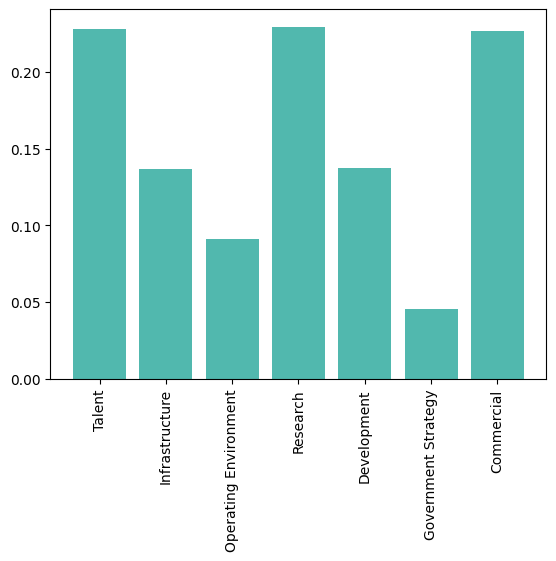

In [11]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print("Coefficients:", lasso_coef)

columns = ["Talent", "Infrastructure", "Operating Environment", "Research", "Development", "Government Strategy", "Commercial"]
plt.bar(columns, lasso_coef, color = '#26a69a', alpha=0.8)
plt.xticks(rotation=90)
plt.show()

It looks like Research indicator has the highest impact on the Global AI Index following by Talent and Commercial indicators.

# <div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1em;text-align:center">References</div>

- 'T-Minus AI': A look at the intersection of geopolitics and autonomy (Aug 17, 2020) - https://www.c4isrnet.com/opinion/2020/08/16/t-minus-ai-a-look-at-the-intersection-of-geopolitics-and-autonomy/
- Artificial Intelligence and Great Power Competition (Mar 28, 2023) - https://www.cfr.org/podcasts/artificial-intelligence-and-great-power-competition-paul-scharre
- AI is supposedly the new nuclear weapons — but how similar are they, really? (Jun 29, 2023) - https://www.vox.com/future-perfect/2023/6/29/23762219/ai-artificial-intelligence-new-nuclear-weapons-future
- U.S.-China tech battle entering its ‘primetime’ — and generative A.I. could be the next frontier (Jun 22, 2023) - https://www.cnbc.com/2023/06/23/us-china-tech-war-why-generative-ai-could-be-the-next-battleground.html
- MACHINE POLITICS: EUROPE AND THE AI REVOLUTION (Jul. 1, 2019) - https://www.jstor.org/stable/resrep21907  
- Military Uses of AI: A Risk to International Stability? (Jan 1, 2021) - https://www.jstor.org/stable/resrep28649.5
- Global AI Race: Dominant Players and Aspiring Challengers (Jun 26, 2023) - https://intersog.com/blog/ai-dominant-players-and-aspiring-challengers/
- State of AI Report - https://stateof.ai